In [5]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt


path = '../../CodePass2/runs/'
path = "D:/"
with h5py.File(path+'finale_normal.hdf5', 'r') as f:
    # read the data
    positions = f['x'][:]
    properties = f['properties'][:][0]
    p = f['p'][:]


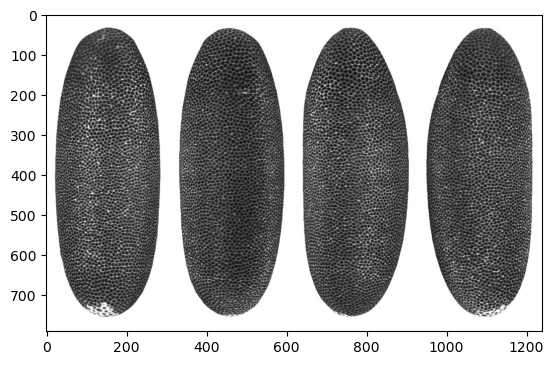

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
stas_vid_dir = "../../StasVideos/fourway.mp4"

def load_video(video_path):
    # load the video
    cap = cv2.VideoCapture(video_path)

    # save the frames
    frames = []
    III = 0
    while True:
        print(III, end = "\r")
        III += 1
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)

    # convert the frames to a numpy array
    frames = np.array(frames)
    plt.imshow(frames[0])
    plt.show()
    return frames


frames = load_video('fourway.mp4')

In [225]:
def plot_sim_img(i, ax):
    xx, yy, zz = positions[i, :, 0], positions[i, :, 1], positions[i, :, 2]


    facecol = (0.1,0.1,0.1,1)
    edgecol = (0.6,0.6,0.6,1)
    # edgecol = "none"
    s = 9
    dist = 55
    # dorsal
    yyy, xxx = yy, -xx
    zsort = np.argsort(zz)
    ax.scatter(yyy[zsort], xxx[zsort], edgecolors=edgecol, facecolors=facecol, s = s*(zz[zsort]+20)/10,)

    # ventral
    yyy, xxx = yy, -xx
    zsort = np.argsort(zz)[::-1]
    ax.scatter(-yyy[zsort] + dist, xxx[zsort], edgecolors=edgecol, facecolors=facecol, s = -s*(zz[zsort]-20)/10)

    # side
    zzz, xxx = zz, -xx
    ysort = np.argsort(yy)
    ax.scatter(-zzz[ysort]+ 2*dist, xxx[ysort] , edgecolors=edgecol, facecolors=facecol, s = s*(yy+10)[ysort]/8)

    ax.set_xlim(-30, 140)
    ax.set_ylim(-63, 80)

    ax.set_aspect('equal')
    

Text(0.5, 1.0, 'Simulation')

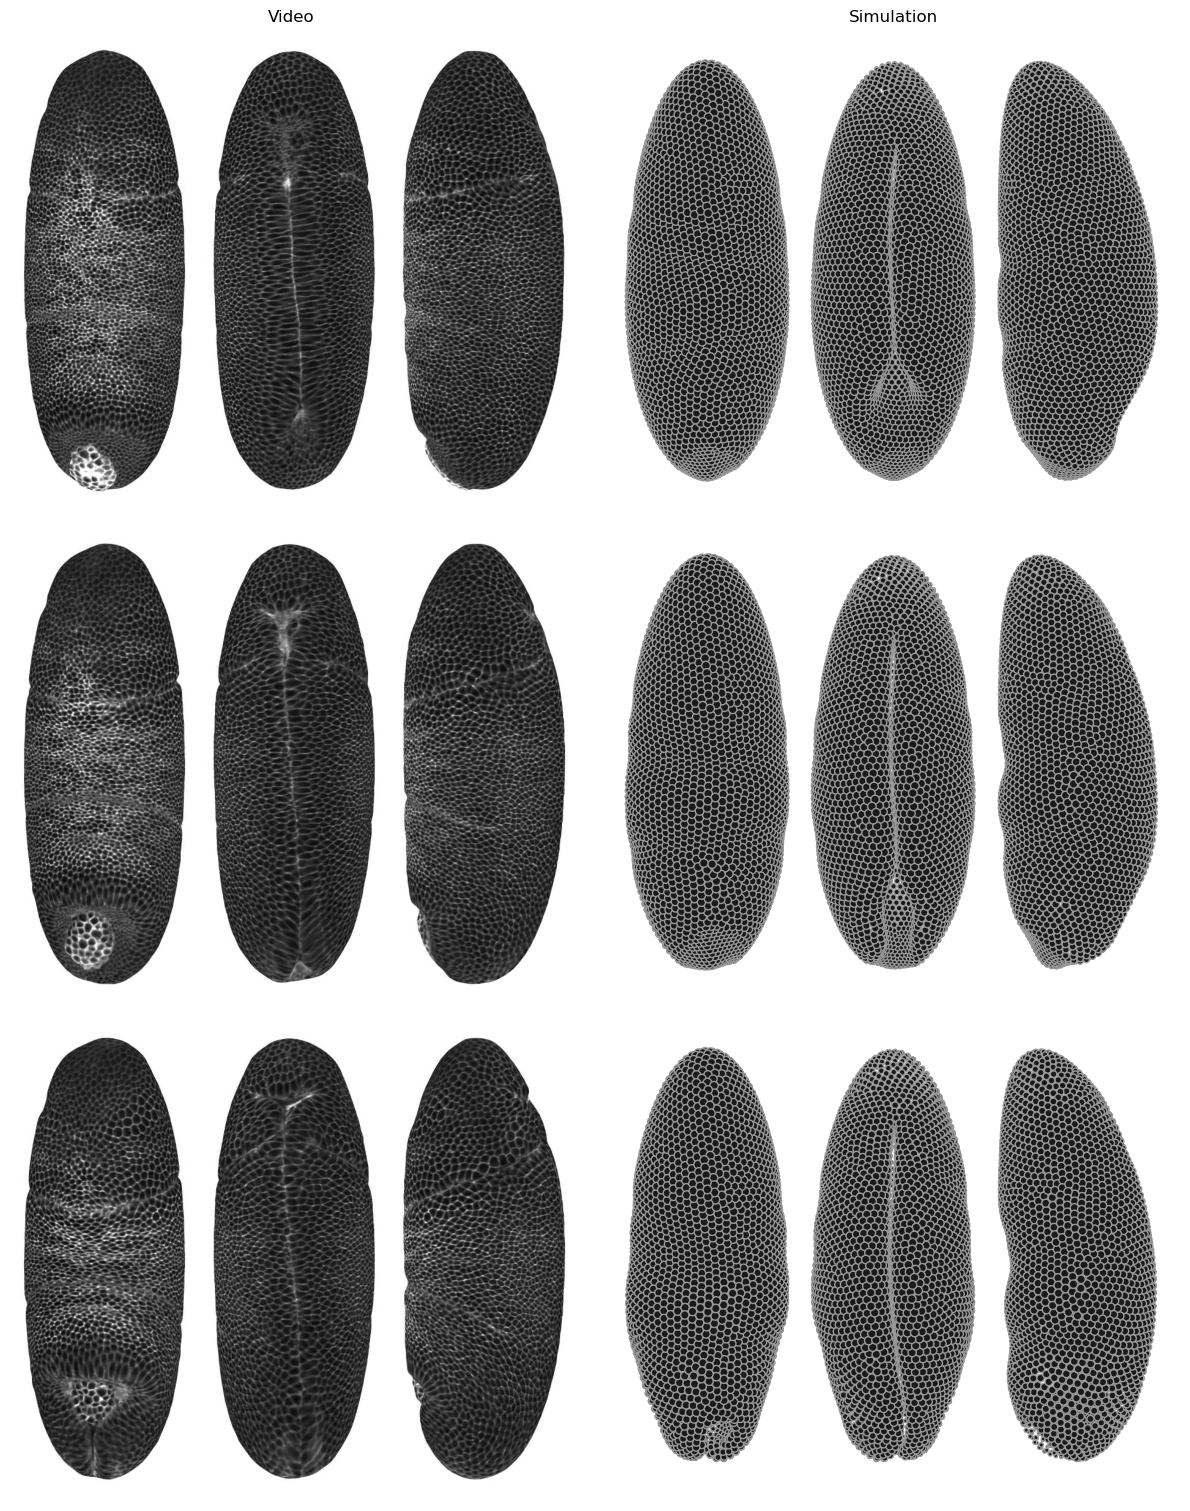

In [226]:
xsize = 12
ysize = 5
n_images = 3
fig, axs = plt.subplots(n_images, 2, figsize=(xsize, ysize*n_images), constrained_layout=True)

video_axs = axs[:, 0]
sim_axs = axs[:, 1]

offset = 6
sim_speed = 900
stas_speed = 15

for i in range(n_images):
    iii = i + offset
    video_axs[i].imshow(cv2.cvtColor(frames[iii*stas_speed][:,:920], cv2.COLOR_BGR2RGB))
    video_axs[i].axis('off')

    plot_sim_img((i+1)*sim_speed, sim_axs[i])
    sim_axs[i].axis('off')

video_axs[0].set_title("Video")
sim_axs[0].set_title("Simulation")
